Bitcoin Price Prediction using Machine Learning in Python Using various Classifiers

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
# pip install xgboost

In [9]:
from xgboost import XGBClassifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [7]:
import warnings

IMPORTING THE DATASETS

In [10]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733
1,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757813,22429.757813,17353192895
2,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22219.769531,22765452204
3,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,21718.080078,22536575684
4,2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,20363.021484,30364664171


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,33287.299238,33888.042383,32788.992235,33398.513129,33398.513129,1.929252e+10
std,8549.001824,8835.703666,8341.303208,8668.187047,8668.187047,1.127217e+10
min,20187.876953,20370.595703,19628.253906,20187.244141,20187.244141,5.331173e+09
25%,27147.758789,27470.321289,26763.046875,27176.172851,27176.172851,1.214983e+10
50%,29449.091797,29991.615234,29131.578125,29473.787109,29473.787109,1.639868e+10
75%,39698.154297,40195.042969,39374.140625,39889.679688,39889.679688,2.268563e+10
max,68341.054688,68869.867188,62386.519531,68330.414063,68330.414063,9.836700e+10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


GRAPHICAL ANALYSIS

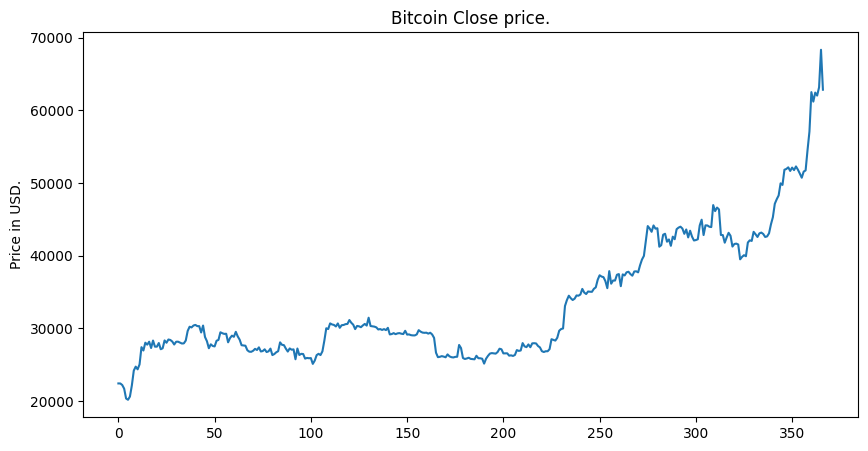

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.')
plt.ylabel('Price in USD.')
plt.show()

DROPPING SAME DATA COL

In [18]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((367, 7), (367, 7))

In [19]:
df = df.drop(['Adj Close'], axis=1)

CHECKING FOR NULL VALUES IN THE DATA SET

In [20]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

FEATURES AND THEIR SUBPLOTS

In [21]:
# features i.e `x`
features = ['Open','High','Low','Close']            # as AdjClose col is dropped

<Axes: >

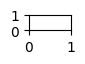

In [28]:
plt.subplot(20, 10, 1)

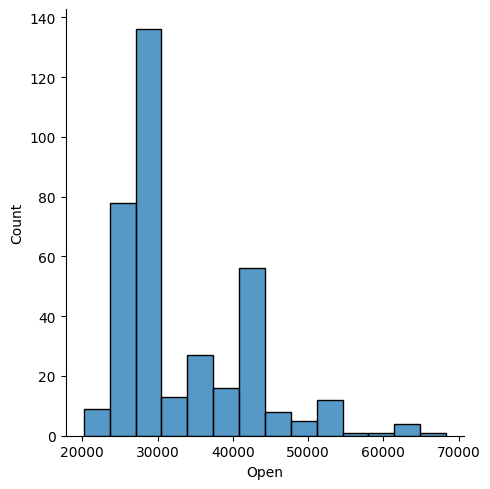

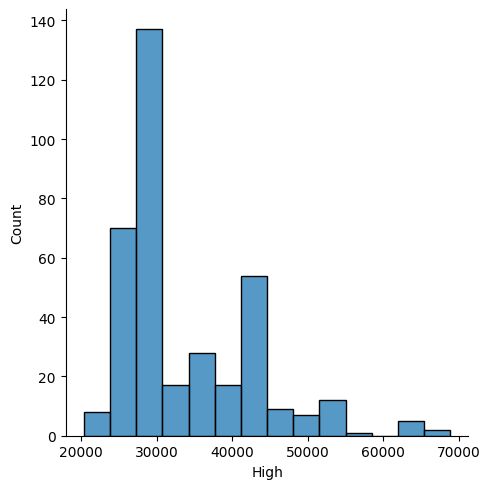

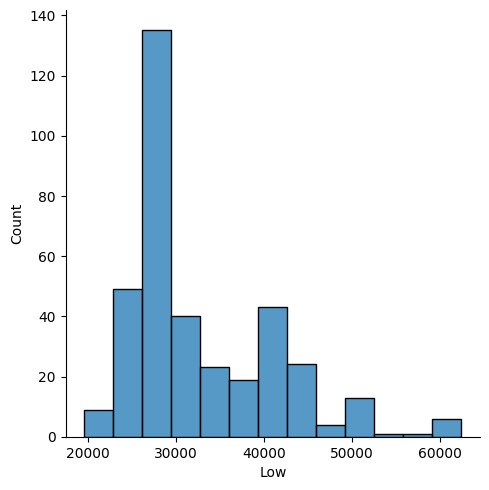

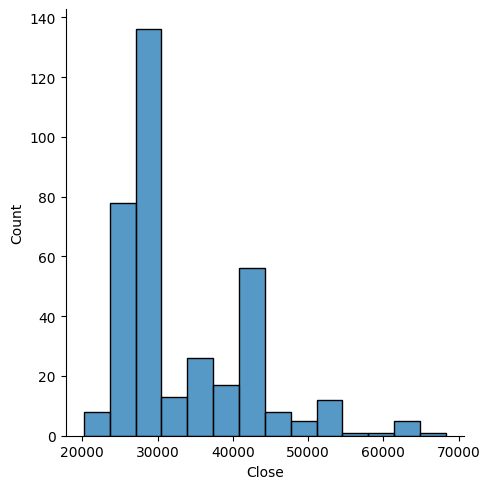

In [30]:
for i ,col in enumerate (features):
    # plt.subplot(2,2,i+1)
    sb.displot(df[col])
plt.show()

JOINT PLOT

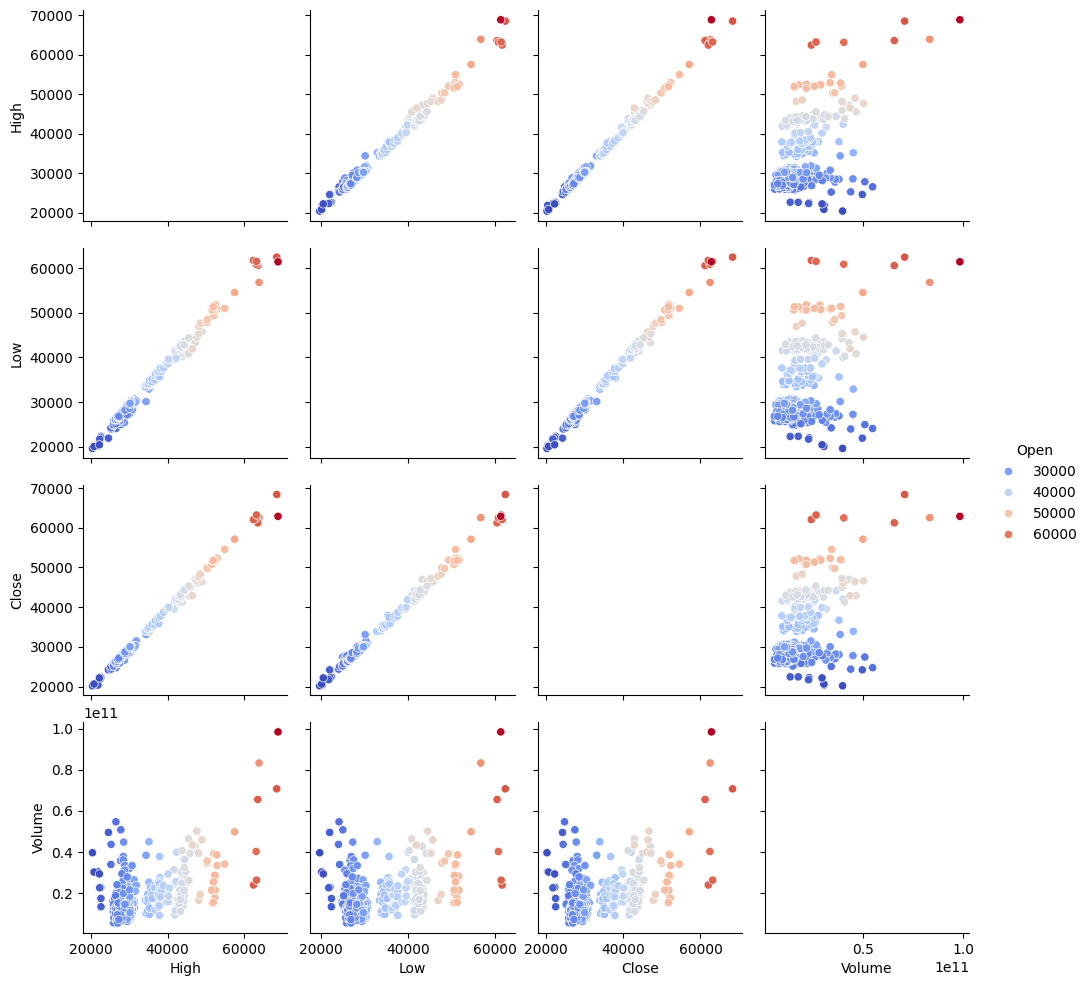

In [37]:
sb.pairplot(df,hue='Open',palette='coolwarm')

FEATURE ENG..

In [38]:
# differentiating date
split = df['Date'].str.split('-',expand=True)

In [39]:
df['year'] = split[0].astype('int')
df['month'] = split[1].astype('int')
df['day'] = split[2].astype('int')

In [40]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,13317001733,2023,3,5
1,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757813,17353192895,2023,3,6
2,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204,2023,3,7
3,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684,2023,3,8
4,2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171,2023,3,9


In [45]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,13317001733,1970,3,5,1
1,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757813,17353192895,1970,3,6,1
2,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204,1970,3,7,1
3,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684,1970,3,8,1
4,2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171,1970,3,9,1


In [46]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

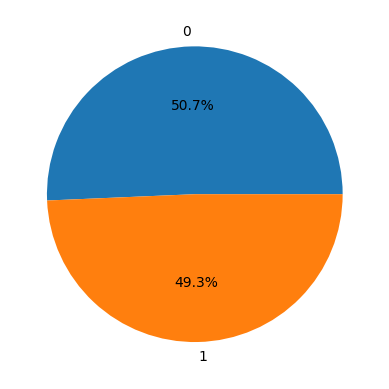

In [51]:
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

HEAT MAP

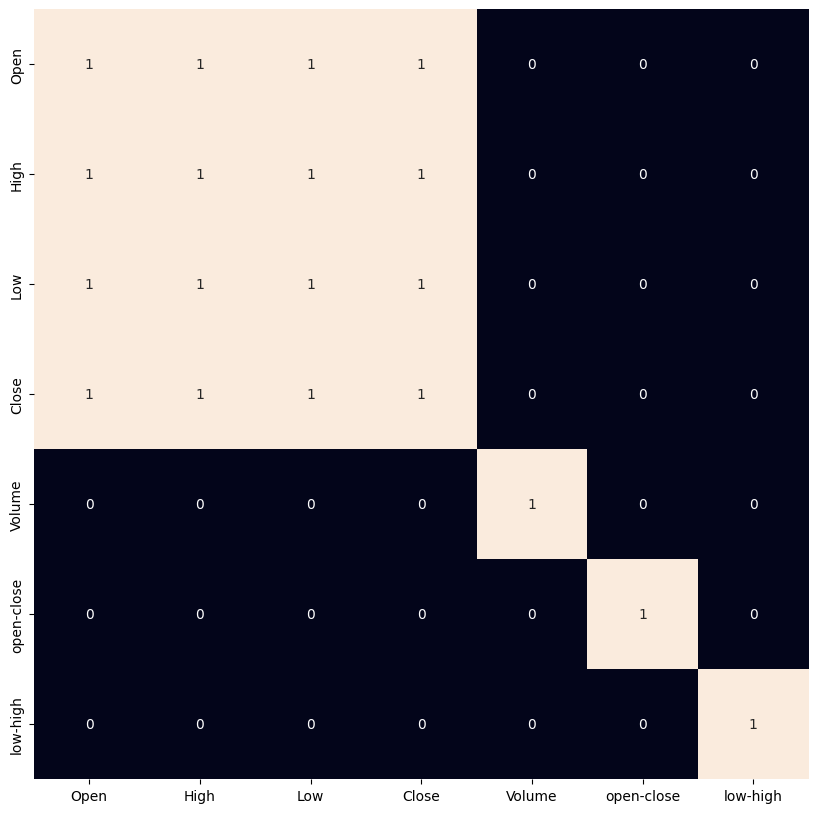

In [54]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 10))
sb.heatmap(correlation_matrix > 0.9, annot=True, cbar=False)
plt.show()

INTERACTIVE PLOTS

In [56]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
import plotly.express as px

In [61]:
fig = px.density_heatmap(df, x=df.columns[0])
fig.show()

In [62]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(330, 3) (37, 3)


MODEL DEVELOPMENT AND EVALUATION OF ACCURACY 

In [66]:
model = [LogisticRegression(),SVC(kernel='poly',probability=True),XGBClassifier()]

In [68]:
for i in range(3):
   model[i].fit(X_train, Y_train)
   print(f'{model[i]} : ')
   print('Training Accuracy : ', 100*metrics.roc_auc_score(Y_train, model[i].predict_proba(X_train)[:,1]))
   print('Validation Accuracy : ', 100*metrics.roc_auc_score(Y_valid, model[i].predict_proba(X_valid)[:,1]))
   print()

LogisticRegression() : 
Training Accuracy :  56.27180899908173
Validation Accuracy :  54.166666666666664

SVC(kernel='poly', probability=True) : 
Training Accuracy :  60.67217630853994
Validation Accuracy :  51.33928571428572

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Acc

AMONG THE ABOVE CLASSIFIERS WE CAN OBSERVE THAT XGB CLASSIFIER DOES HAVE HIGH ACCURACY

PLOTTING THE CONFUSION MATRIX

In [72]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 217.9 kB/s eta 0:00:49
   ---------------------------------------- 0.1/10.6 MB 272.3 kB/s eta 0:00:39
   ---------------------------------------- 0.1/10.6 MB 272.3 kB/s eta 0:00:39
   ---------------------------------------- 0.1/10.6 MB 400.9 kB/s eta 0:00:27
    --------------------------------------- 0.1/10.6 MB 387.0 kB/s eta 0:00:28
    --------------------------------------- 0.2/10.6 MB 497.6 kB/s eta 0:00:21
   - -------------------------------------- 0.3/10.6 MB 678.0 kB/s eta 0:00:16
   - -------------------------------------- 0.4/10.6 MB 782.8 kB/s eta 0:00:14
   - -------------

  You can safely remove it manually.


In [74]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'